# Exercícios: Análise e manipulação de dados

In [2]:
import os

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

## Parte 1: Dados de utilizadores de cartões de crédito

Carregue o conjunto de dados [Credit Card Customers](https://www.kaggle.com/sakshigoyal7/credit-card-customers), guardado no ficheiro Excel definido pela variável `xlxs_file_path`, para uma tabela de dados da biblioteca [Pandas](https://pandas.pydata.org/).

In [3]:
data_path = '../data/' if os.path.exists('../data/') else 'https://raw.githubusercontent.com/TheAwesomeGe/DECD/main/data/'
xlsx_file_path = data_path + 'BankChurners.xlsx'

In [4]:
df = pd.read_excel(xlsx_file_path)

Realize as seguintes etapas de pré-processamento de dados:

1. Verifique que a importação foi bem sucedida e analise as primeiras entradas do conjunto de dados.

In [5]:
df.head()

,Customer_Age,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,...,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Attrition_Flag,CLIENTNUM,Gender
0,45,3,High School,Married,$60K - $80K,Blue,39,5,1,3,...,777,11914.0,1.335,1144,42,1.625,0.061,Existing Customer,768805383,M
1,49,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,...,864,7392.0,1.541,1291,33,3.714,0.105,Existing Customer,818770008,F
2,51,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,...,0,3418.0,2.594,1887,20,2.333,0.000,Existing Customer,713982108,M
3,40,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,...,2517,796.0,1.405,1171,20,2.333,0.760,Existing Customer,769911858,F
4,40,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,...,0,4716.0,2.175,816,28,2.500,0.000,Existing Customer,709106358,M


2. Remova os seguintes atributos:
    * o número de cliente (uma vez que os identificadores locais não são informação útil para tarefas de descoberta de padrões)
    * as características discriminatórias de género, por forma a que os resultados não sejam enviesados por estes atributos (o que seria pouco ético e, de certa forma, ilegal segundo a lei portuguesa)

In [6]:
df.drop(columns=['CLIENTNUM', 'Gender'], inplace=True)

3. Defina como categóricos os seguintes atributos: `Education_Level`, `Marital_Status`, `Income_Category`, `Card_Category` e `Attrition_Flag`.

In [7]:
df['Education_Level'] = df['Education_Level'].astype('category')
df['Marital_Status'] = df['Marital_Status'].astype('category')
df['Income_Category'] = df['Income_Category'].astype('category')
df['Card_Category'] = df['Card_Category'].astype('category')
df['Attrition_Flag'] = df['Attrition_Flag'].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Customer_Age              10127 non-null  int64   
 1   Dependent_count           10127 non-null  int64   
 2   Education_Level           10127 non-null  category
 3   Marital_Status            10127 non-null  category
 4   Income_Category           10127 non-null  category
 5   Card_Category             10127 non-null  category
 6   Months_on_book            10127 non-null  int64   
 7   Total_Relationship_Count  10127 non-null  int64   
 8   Months_Inactive_12_mon    10127 non-null  int64   
 9   Contacts_Count_12_mon     10127 non-null  int64   
 10  Credit_Limit              10127 non-null  float64 
 11  Total_Revolving_Bal       10127 non-null  int64   
 12  Avg_Open_To_Buy           10127 non-null  float64 
 13  Total_Amt_Chng_Q4_Q1      10127 non-null  floa

4. Defina o atributo `Attrition_Flag` como *target*, criando um dicionário que mapeia um inteiro diferente para cada um dos valores possíveis deste atributo.

In [8]:
target = {k: v for k, v in enumerate(df['Attrition_Flag'].unique())}

5. Guarde uma cópia dos dados num ficheiro Excel com o nome *credito.xlsx*.

In [9]:
df.to_excel('credito.xlsx')

6. Identifique os atributos que têm valores em falta. (**Nota**: Neste conjunto de dados, os valores em falta são representados pelo valor `'Unknown'`. Comece por aplicar o método `replace('Unknown', np.nan)` sobre a tabela de dados.)

In [10]:
df.replace('Unknown', np.nan, inplace=True)
df.isnull().sum()

/var/folders/9n/6m45fxg142j6jt4fdyf75vdm0000gn/T/ipykernel_68530/3994931777.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df.replace('Unknown', np.nan, inplace=True)


Customer_Age                   0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category             1112
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
Attrition_Flag                 0
dtype: int64

7. Utilize imputação para preencher os valores em falta do nível de educação com um valor representativo.  

In [11]:
df['Education_Level'].fillna(df['Education_Level'].mode()[0], inplace=True)

/var/folders/9n/6m45fxg142j6jt4fdyf75vdm0000gn/T/ipykernel_68530/1322953340.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Education_Level'].fillna(df['Education_Level'].mode()[0], inplace=True)


ValueError: assignment destination is read-only

8. Descarte as restantes observações com valores em falta.

In [ ]:
df.dropna(inplace=True)

9. Binarize o atributo categórico `Attrition_Flag`.

In [ ]:
bin_values, index = pd.factorize(df['Attrition_Flag'])
df['Attrition_Flag'] = bin_values

10. Calcule as correlações entre os atributos numéricos do conjunto de dados e visualize-as usando um mapa de calor.

In [ ]:
sns.heatmap(df.corr(numeric_only=True));

11. Visualize como se relacionam os dois atributos a correlação mais alta.

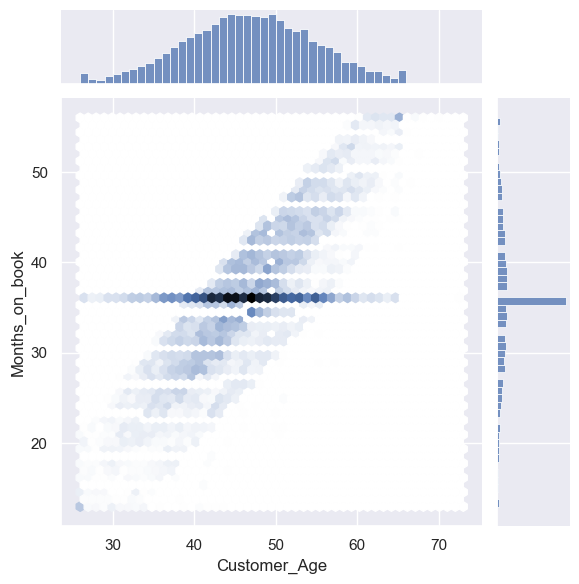

In [12]:
sns.jointplot(data=df, x='Customer_Age', y='Months_on_book', kind='hex');

9. Verifique se os atributos `Credit_Limit` e `Dependent_count` têm *outliers*. Em caso afirmativo, conte-os. (**Sugestão**: [How To Find Outliers in Data Using Python (and How To Handle Them)](https://careerfoundry.com/en/blog/data-analytics/how-to-find-outliers/#how-to-find-outliers))

In [ ]:
df[['Credit_Limit', 'Dependent_count']].describe()

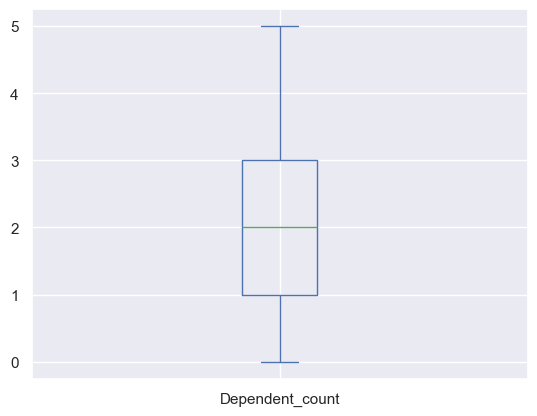

In [15]:
df['Dependent_count'].plot(kind='box');

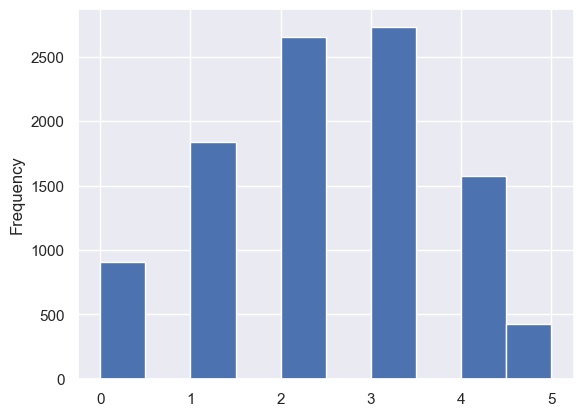

In [14]:
df['Dependent_count'].plot(kind='hist');

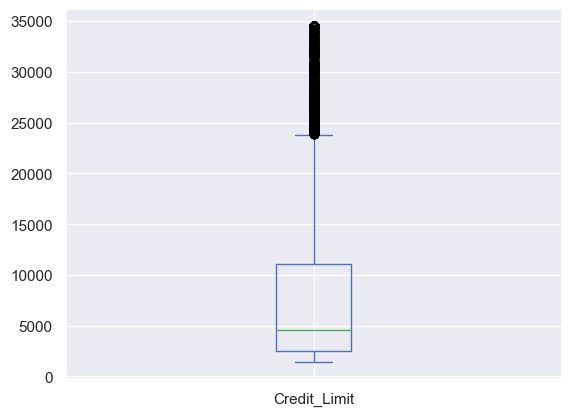

In [13]:
df['Credit_Limit'].plot(kind='box');

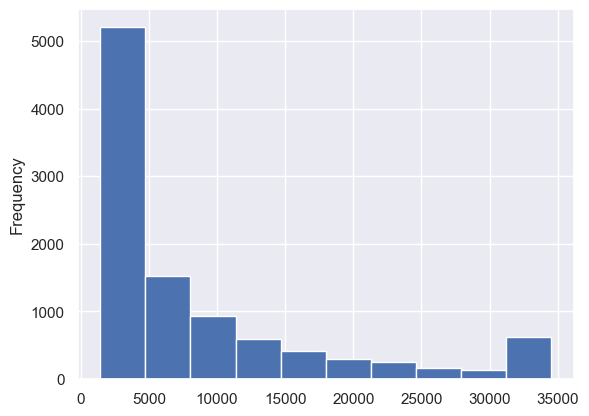

In [12]:
df['Credit_Limit'].plot(kind='hist');

In [ ]:
def find_outliers(f):
    q1 = f.quantile(0.25)
    q3 = f.quantile(0.75)
    iqr = q3 - q1
    return f[(f < (q1 - 1.5 * iqr)) | (f > (q3 + 1.5 * iqr))]

In [ ]:
find_outliers(df['Dependent_count'])

In [ ]:
find_outliers(df['Credit_Limit'])

## Parte 2 - Desempenho académico

Carregue o conjunto de dados [Students' Academic Performance Dataset](https://www.kaggle.com/datasets/aljarah/xAPI-Edu-Data), guardado no ficheiro CSV definido pela variável `csv_file_path` e faça uma análise semelhante à realizada com o conjunto de dados sobre clientes de cartões de crédito.

In [ ]:
csv_file_path = data_path + 'xAPI-Edu-Data.csv'